# EDA Tattoo Removal Marketing Report

### Executive Summary:
The goal of this project is to stop this financial leakage by creating a data-driven framework that defines the most profitable customer segments and directs marketing resources exclusively toward those high-LTV acquisition channels.

#### Import libraries and data loading

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# pd data frame for the customer data
df = pd.read_csv('/content/drive/MyDrive/12 Days of Data Science/Day 1, Marketing EDA/customer_tat.csv')

# Show the first 5 rows
df.head(5)

,Client_ID,Session_ID,Session_Type,Session_Date,Days_Since_Prior,Client_Gender,Client_Age,Treatment_Area,Lidocaine_Used,Session_Cost,Client_Status,Reason_for_Removal,Source_Channel,Tattoo_Age_Yrs,Tattoo_Location
0,101,1,First Session,1/5/24,0,Female,32,Medium Area,True,450,Dropped Off,Regret/Aesthetic,Google Search,5,Wrist
1,102,1,First Session,1/10/24,0,Male,45,Small Area,False,275,Dropped Off,Cover Up Prep,Tattoo Artist Ref,12,Bicep
2,103,1,First Session,1/12/24,0,Female,28,Large Area,True,700,Dropped Off,Career Advancement,Instagram Ad,3,Neck
3,104,1,First Session,1/15/24,0,Male,38,Small Spot,False,175,Dropped Off,Regret/Aesthetic,Word of Mouth,8,Hand
4,105,1,First Session,1/20/24,0,Non-Binary,25,Small Area,True,325,Dropped Off,Cover Up Prep,Google Search,2,Ankle


#### Data information

In [3]:
print(df.shape)
unique_customer_count = df['Client_ID'].nunique()
# Print unique customer count
print(f"\nThere are {unique_customer_count} unique customers in the dataset.")

(212, 15)

There are 80 unique customers in the dataset.


In [4]:
# Get basic information on the data set
print("\nData set info:")
print(df.info)


Data set info:
<bound method DataFrame.info of      Client_ID  Session_ID   Session_Type Session_Date  Days_Since_Prior  \
0          101           1  First Session       1/5/24                 0   
1          102           1  First Session      1/10/24                 0   
2          103           1  First Session      1/12/24                 0   
3          104           1  First Session      1/15/24                 0   
4          105           1  First Session      1/20/24                 0   
..         ...         ...            ...          ...               ...   
207        178           1  First Session       6/1/24                 0   
208        179           1         Repeat       7/5/24                 0   
209        179           2         Repeat      8/20/24                46   
210        180           1         Repeat      8/15/24                 0   
211        180           2         Repeat      9/30/24                46   

    Client_Gender  Client_Age Treatment

#### Data Validation and Cleaning

In [5]:
# Identify data types
df.dtypes

# Check for missing values explicitly
print("\nMissing Values:")
print(df.isnull().sum())

# Convert 'Session_Date' to datetime
df['Session_Date'] = pd.to_datetime(df['Session_Date'])

print("\nData types after converting 'Session_Date':")
print(df.dtypes)


Missing Values:
Client_ID             0
Session_ID            0
Session_Type          0
Session_Date          0
Days_Since_Prior      0
Client_Gender         0
Client_Age            0
Treatment_Area        0
Lidocaine_Used        0
Session_Cost          0
Client_Status         0
Reason_for_Removal    0
Source_Channel        0
Tattoo_Age_Yrs        0
Tattoo_Location       0
dtype: int64

Data types after converting 'Session_Date':
Client_ID                      int64
Session_ID                     int64
Session_Type                  object
Session_Date          datetime64[ns]
Days_Since_Prior               int64
Client_Gender                 object
Client_Age                     int64
Treatment_Area                object
Lidocaine_Used                  bool
Session_Cost                   int64
Client_Status                 object
Reason_for_Removal            object
Source_Channel                object
Tattoo_Age_Yrs                 int64
Tattoo_Location               object
dtype: obj

/tmp/ipython-input-2881257159.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Session_Date'] = pd.to_datetime(df['Session_Date'])


In [6]:
# Identify data types
df.dtypes

# Check for missing values explicitly
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Client_ID             0
Session_ID            0
Session_Type          0
Session_Date          0
Days_Since_Prior      0
Client_Gender         0
Client_Age            0
Treatment_Area        0
Lidocaine_Used        0
Session_Cost          0
Client_Status         0
Reason_for_Removal    0
Source_Channel        0
Tattoo_Age_Yrs        0
Tattoo_Location       0
dtype: int64


In [7]:
# Summary Stats
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        Client_ID  Session_ID                   Session_Date  \
count  212.000000  212.000000                            212   
mean   134.575472    2.509434  2024-07-21 17:53:12.452830208   
min    101.000000    1.000000            2024-01-05 00:00:00   
25%    116.000000    1.000000            2024-05-15 00:00:00   
50%    130.500000    2.000000            2024-08-03 00:00:00   
75%    149.250000    4.000000            2024-10-02 00:00:00   
max    180.000000    8.000000            2024-12-15 00:00:00   
std     21.793929    1.624722                            NaN   

       Days_Since_Prior  Client_Age  Session_Cost  Tattoo_Age_Yrs  
count        212.000000  212.000000    212.000000      212.000000  
mean          28.476415   37.613208    387.971698        8.174528  
min            0.000000   22.000000    175.000000        1.000000  
25%            0.000000   30.000000    200.000000        4.000000  
50%           45.000000   36.000000    362.500000        7.000

#### Feature Engineering
- Break the data down by client profile
- Log book >>>> client profile
- Identify Lifetime Value (LTV)

In [8]:
# Aggregation of data to a client level
client_df = df.groupby('Client_ID').agg({
    'Session_Cost': 'sum',      # LTV
    'Session_ID': 'count',      # Number of sessions completed
    'Source_Channel': 'first',  # Marketing Channel
    'Client_Age': 'mean',       # Demographic Info
    'Days_Since_Prior': 'mean'  # Average gap between sessions
}).reset_index()

# Rename columns
client_df.rename(columns={
    'Session_Cost': 'LTV',
    'Session_ID': 'Total_Sessions'
}, inplace=True)

client_df.head(5)

,Client_ID,LTV,Total_Sessions,Source_Channel,Client_Age,Days_Since_Prior
0,101,450,1,Google Search,32.0,0.0
1,102,275,1,Tattoo Artist Ref,45.0,0.0
2,103,700,1,Instagram Ad,28.0,0.0
3,104,175,1,Word of Mouth,38.0,0.0
4,105,325,1,Google Search,25.0,0.0


In [9]:
# Summary stats
print(client_df.describe())

       Client_ID          LTV  Total_Sessions  Client_Age  Days_Since_Prior
count    80.0000    80.000000       80.000000   80.000000         80.000000
mean    140.5000  1028.125000        2.650000   36.419062         17.873170
std      23.2379   934.148016        1.916616    9.090906         16.506493
min     101.0000   175.000000        1.000000   22.000000          0.000000
25%     120.7500   400.000000        1.000000   29.000000          0.000000
50%     140.5000   700.000000        2.000000   35.583333         22.750000
75%     160.2500  1356.250000        4.000000   44.000000         34.500000
max     180.0000  4900.000000        8.000000   55.000000         39.333333


##### Retention Leakage

Session_Number
1    80
2    45
3    33
4    25
5    16
6     9
7     3
8     1
Name: count, dtype: int64


/tmp/ipython-input-37714062.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funnel.index, y=funnel.values, palette='viridis')


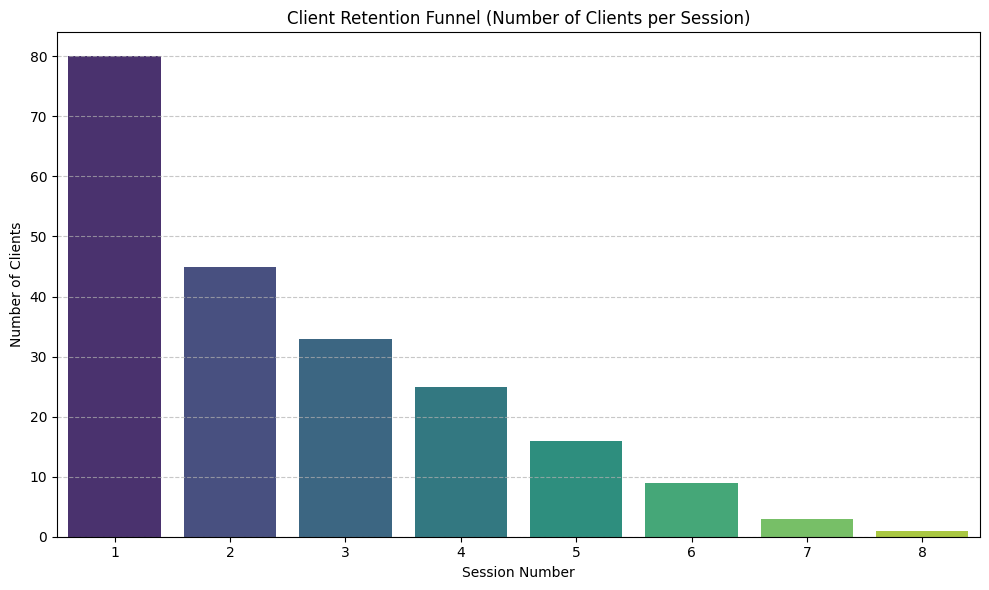

In [10]:
df['Session_Number'] = df.sort_values(['Client_ID', 'Session_Date']).groupby('Client_ID').cumcount() + 1

# Funnel
funnel = df['Session_Number'].value_counts().sort_index()
print(funnel)

# Visualize the funnel using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=funnel.index, y=funnel.values, palette='viridis')
plt.xlabel('Session Number')
plt.ylabel('Number of Clients')
plt.title('Client Retention Funnel (Number of Clients per Session)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*Findings*
- There is a noticebale drop of clients from session 1 to session 2.

--- Client Counts Per Session---
   Session_Number  Unique_Clients
0               1              80
1               2              45
2               3              33
3               4              25
4               5              16
5               6               9
6               7               3
7               8               1


/tmp/ipython-input-672803307.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


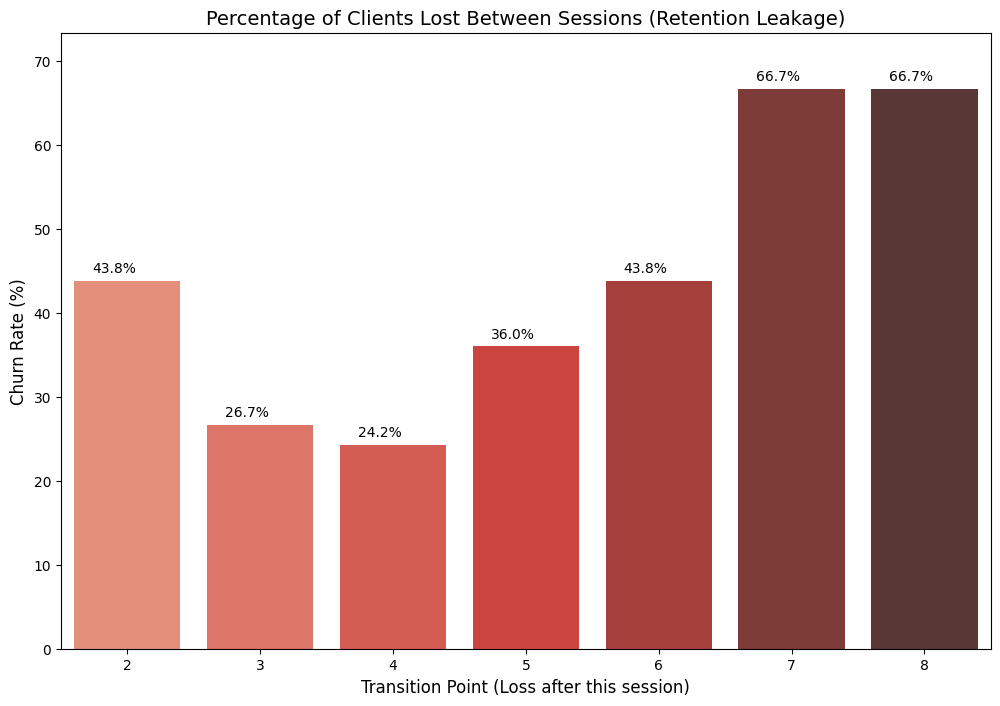

In [11]:
# Visualize retention by percentage drop for each segment
session_counts = df.groupby('Session_Number')['Client_ID'].nunique().reset_index()
session_counts.rename(columns={'Client_ID': 'Unique_Clients'}, inplace=True)

print("--- Client Counts Per Session---")
print(session_counts)

# --- Calculate percentage lost---
# Calculate clients lost and retention rate
session_counts['Previous_Clients'] = session_counts['Unique_Clients'].shift(1)

# Total number of clients who started (Session 1 count)
total_starters = session_counts.loc[session_counts['Session_Number'] ==1, 'Unique_Clients'].iloc[0]

# Calculate the drop off count
session_counts['Clients_Lost'] = session_counts['Previous_Clients'] - session_counts['Unique_Clients']
session_counts.loc[session_counts['Session_Number']==1, 'Clients_Lost'] = 0 # There is no loss before session 1

# Calculate the percentage lost (Customer Churn Rate between sessions)
session_counts['Percent_Lost'] = (session_counts['Clients_Lost']/ session_counts['Previous_Clients']) * 100

# Fill the first rows lost pecentage with NaN or 0, as it starts
session_counts.loc[session_counts['Session_Number'] == 1, 'Percent_Lost'] = 0

# Visualize using a Leakage Plot
plt.figure(figsize=(12,8))
# Only plot from session 2 and onwards, because loss occurs after the prior session
leakage_data = session_counts[session_counts['Session_Number'] > 1]

sns.barplot(
    x='Session_Number',
    y='Percent_Lost',
    data=leakage_data,
    palette='Reds_d' # The red emphasizes loss
)

plt.title('Percentage of Clients Lost Between Sessions (Retention Leakage)', fontsize=14)
plt.xlabel('Transition Point (Loss after this session)', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.ylim(0, leakage_data['Percent_Lost'].max() * 1.1) # Set Y axis for full scale

# Add the percentage values on top of the bars for easier interpretation
for index, row in leakage_data.iterrows():
  plt.text(
      row['Session_Number'] - 2.1,
      row['Percent_Lost'] + 1,
      f"{row['Percent_Lost']:.1f}%",
      color='black',
      ha="center",
      fontsize=10
  )
plt.show()

-- Findings--
- We should focus on the churn rates from session 1-2, 4-6, and 6-7.

#### Retention Analysis by Source Channel

In [12]:
# Calculate the number of clients for each session number, grouped by 'Source_Channel'
retention_by_channel = df.groupby(['Source_Channel', 'Session_Number']).agg(client_count=('Client_ID', 'nunique')).reset_index()

# Display the results for the first few channels
display(retention_by_channel.head(10))


,Source_Channel,Session_Number,client_count
0,Facebook Ad,1,14
1,Facebook Ad,2,10
2,Facebook Ad,3,5
3,Facebook Ad,4,2
4,Facebook Ad,5,2
5,Facebook Ad,6,2
6,Facebook Ad,7,1
7,Facebook Ad,8,1
8,Google Search,1,17
9,Google Search,2,7


/tmp/ipython-input-1380141914.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Session_Number', y='client_count', data=channel_data, palette='viridis')
/tmp/ipython-input-1380141914.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Session_Number', y='client_count', data=channel_data, palette='viridis')
/tmp/ipython-input-1380141914.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Session_Number', y='client_count', data=channel_data, palette='viridis')
/tmp/ipython-input-1380141914.py:9: FutureWarning: 

Passing `palette` wi

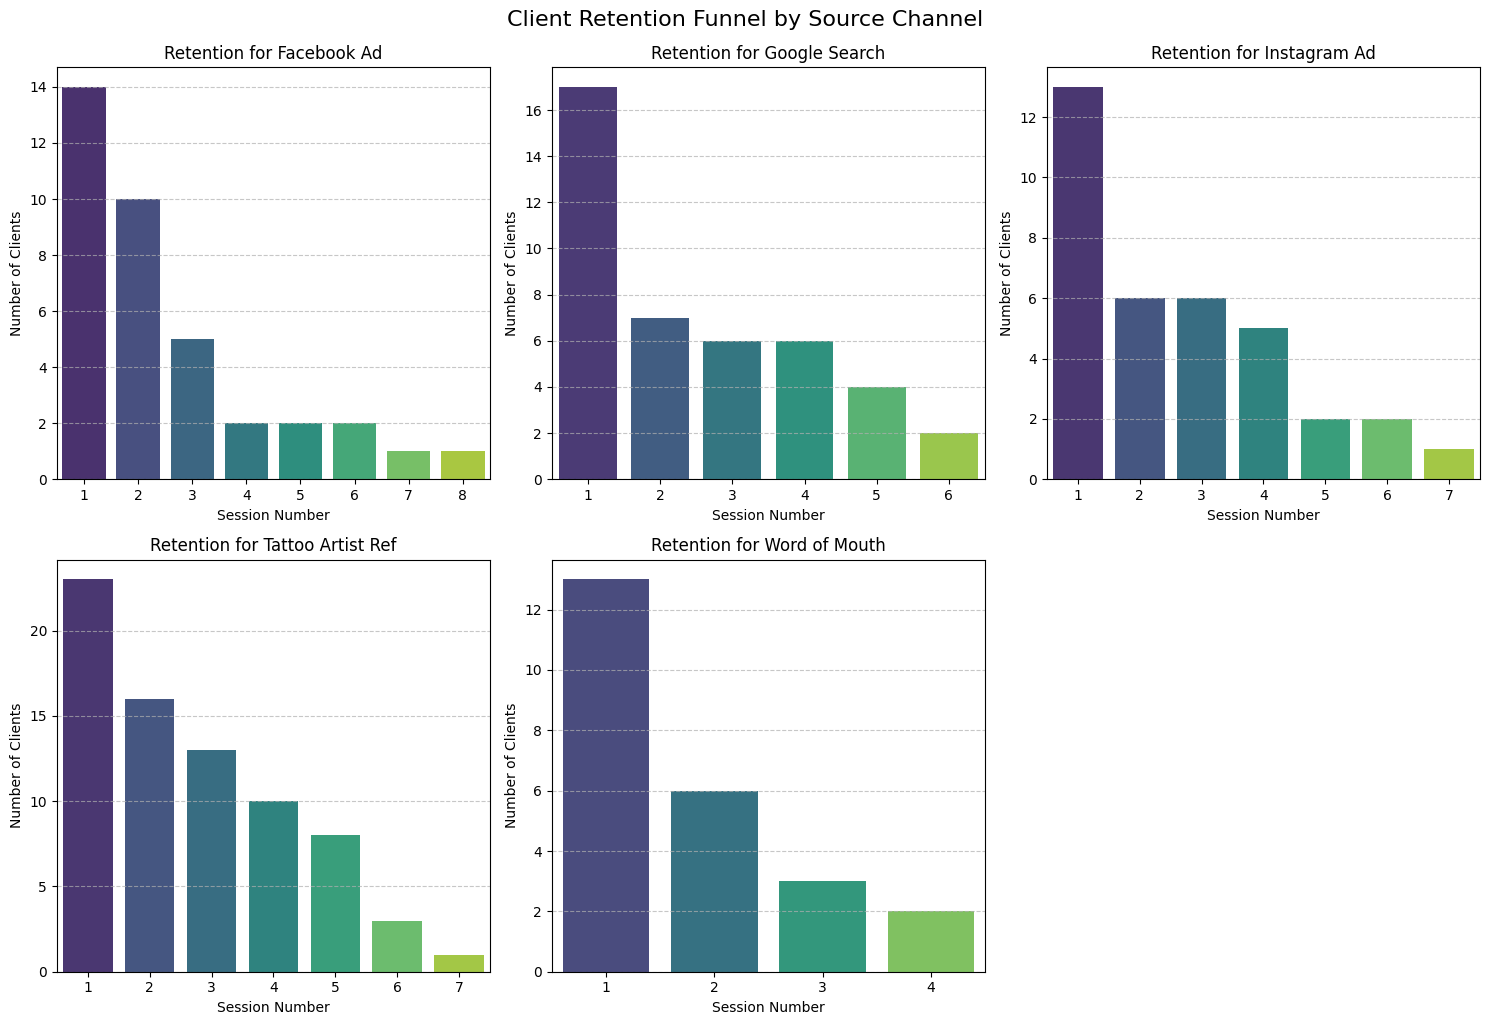

In [13]:
# Get unique source channels for iteration
source_channels = retention_by_channel['Source_Channel'].unique()

# Plot retention funnel for each source channel
plt.figure(figsize=(15, 10))
for i, channel in enumerate(source_channels):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of unique channels
    channel_data = retention_by_channel[retention_by_channel['Source_Channel'] == channel]
    sns.barplot(x='Session_Number', y='client_count', data=channel_data, palette='viridis')
    plt.title(f'Retention for {channel}')
    plt.xlabel('Session Number')
    plt.ylabel('Number of Clients')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
plt.suptitle('Client Retention Funnel by Source Channel', y=1.02, fontsize=16)
plt.show()

--Retention Drop off Analysis--\
#### (Facebook):
- The largest drop for Facebook ads happens from sessions 2-3.
#### (Google Search)
- The drop off seems to happen from sessions 1-2.
#### (Instagram):
- The drop off seems to happen from sessions 1-2.
#### (tattoo Artist Ref):
- This channel has the least drop off in customer retention.
#### (Word of Mouth)
- The drop off happens the most from sessions 1-2.

### Overall Analysis:
- Sessions 1-2 have the greatest drop off for majority of the source channels.  

##### Acquisition ROI Analysis
- Compare average LTV by channel
- Identify and visualize high-value channels

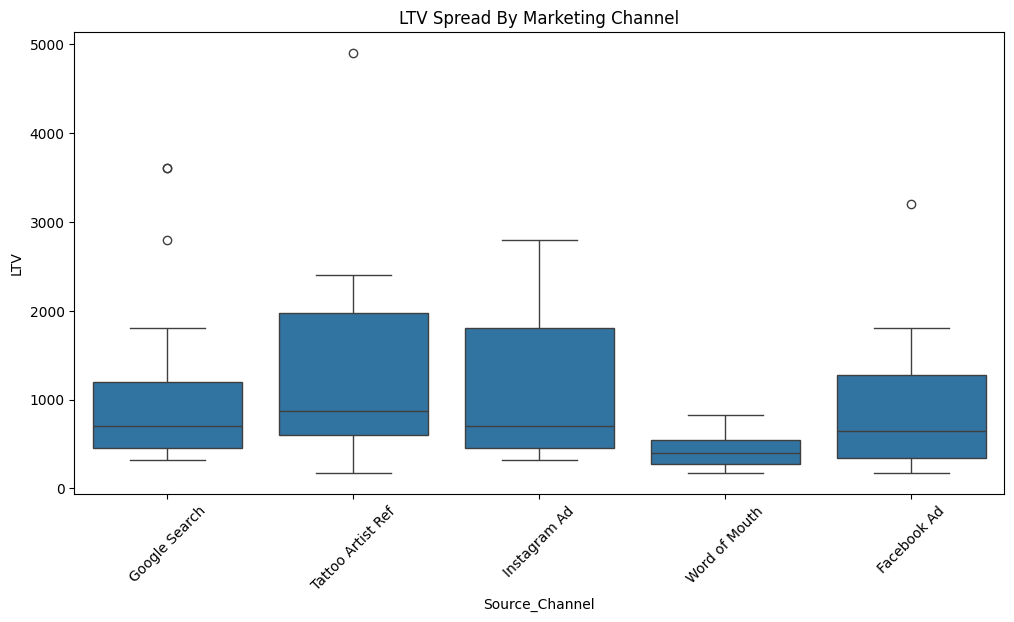

In [14]:
# Identify channel performance based on average LTV
channel__performance = client_df.groupby('Source_Channel')['LTV'].mean().sort_values(ascending=False)

# Visualize
plt.figure(figsize=(12,6))
sns.boxplot(x='Source_Channel', y ='LTV', data=client_df)
plt.title('LTV Spread By Marketing Channel')
plt.xticks(rotation=45)
plt.show()

--Findings--
- Outliers for Google, Tattoo Artist Ref, and Facebook Ad.
- Tattoo ref has the highest median LTV amongst the other channels.

In [15]:
client_df.head()

,Client_ID,LTV,Total_Sessions,Source_Channel,Client_Age,Days_Since_Prior
0,101,450,1,Google Search,32.0,0.0
1,102,275,1,Tattoo Artist Ref,45.0,0.0
2,103,700,1,Instagram Ad,28.0,0.0
3,104,175,1,Word of Mouth,38.0,0.0
4,105,325,1,Google Search,25.0,0.0


##### Correlation Analysis
- Identify features with high correlations.

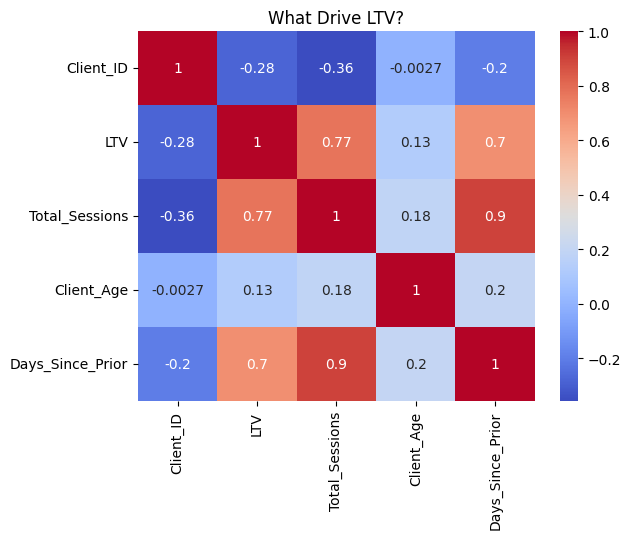

In [16]:
# Correlation Matrix
corr_matrix = client_df.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('What Drive LTV?')
plt.show()

-- Correlation Matrix Findings--
##### High correlation
- LTV seems to have a higher correlation with 'Total_Sessions' and 'Days_Since_Prior'

##### Moderate to weak correlation
- Client_Age seems to have a weak correlation with 'LTV', 'Total_Sessions', and 'Days_Since_Prior'

##### Negative to weak correlation
- 'Client_ID' has negative weak correlations with all of the other features.

#### Visualizing LTV Drivers by Source Channel

To understand how different acquisition channels contribute to LTV based on the identified key drivers, we'll create scatter plots.

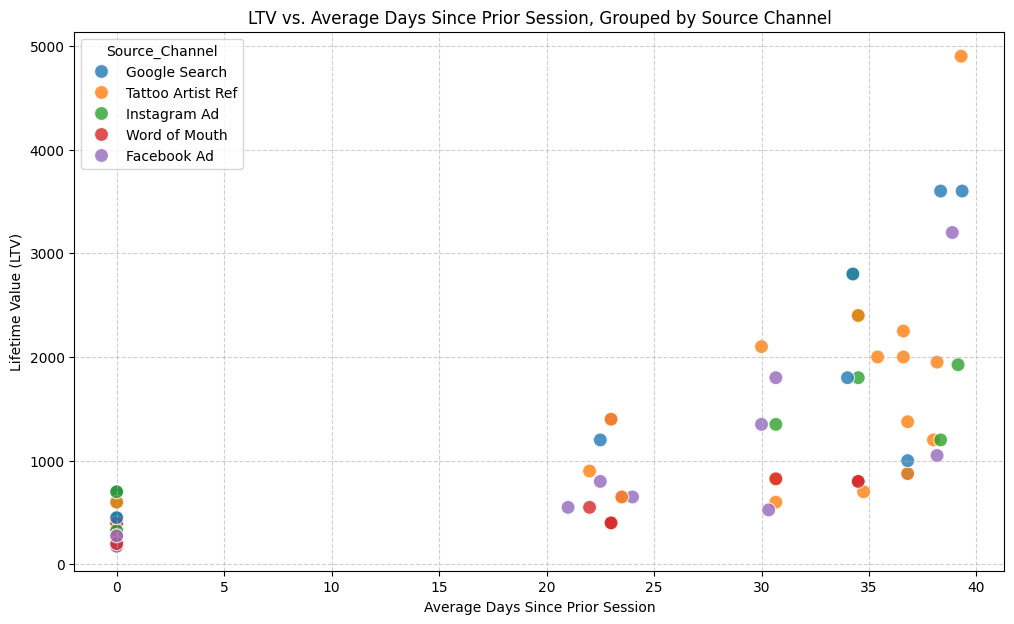

In [17]:
# LTV vs. Days_Since_Prior by Source Channel
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Days_Since_Prior', y='LTV', hue='Source_Channel', data=client_df, s=100, alpha=0.8)
plt.title('LTV vs. Average Days Since Prior Session, Grouped by Source Channel')
plt.xlabel('Average Days Since Prior Session')
plt.ylabel('Lifetime Value (LTV)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

--Findings--
- This plot illustrates the positive correlation between `Days_Since_Prior` and `LTV`.
- It indicates that clients who have longer average gaps between sessions might be committed to a long-term removal process, leading to higher overall LTV.
- Again, the `Source_Channel` distinction can highlight which channels bring in these long-term, high-LTV clients.

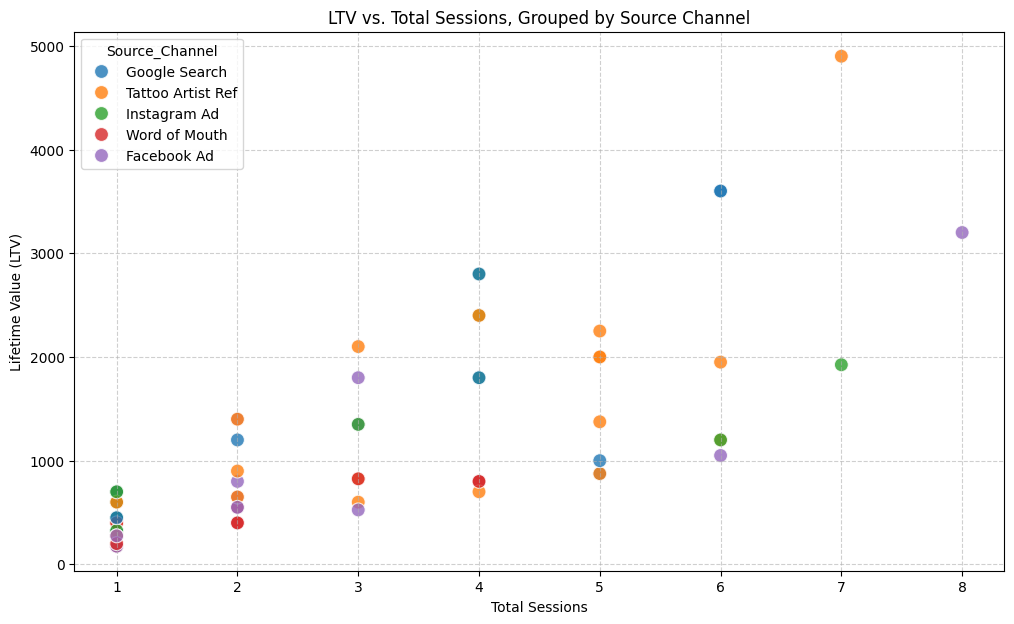

In [18]:
# LTV vs. Total Sessions by Source Channel
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Total_Sessions', y='LTV', hue='Source_Channel', data=client_df, s=100, alpha=0.8)
plt.title('LTV vs. Total Sessions, Grouped by Source Channel')
plt.xlabel('Total Sessions')
plt.ylabel('Lifetime Value (LTV)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

--Findings--
- This plot clearly shows the strong positive relationship between `Total_Sessions` and `LTV`. Clients with more sessions generally have higher LTV.
- Different `Source_Channel`s show varying densities along this trend. For example, 'Tattoo Artist Ref' seems to consistently lead to higher LTV and more sessions.
- We can observe if certain channels tend to cluster in the higher LTV/Total Sessions region.

#### Conclusion


In [19]:
# Save data frames as CSV
df.to_csv('cleaned_customer_tat.csv', index=False)
client_df.to_csv('cleaned_client.csv', index=False)

print("DataFrame successfully exported to csv")

DataFrame successfully exported to csv


## Correlation Analysis for LTV Drivers Summary


### Summary of Correlation Matrix Findings:

The correlation matrix clearly highlights the key drivers of Lifetime Value (LTV):

*   **LTV and Total_Sessions:** There is a strong positive correlation of `0.77` between LTV and `Total_Sessions`, indicating that clients who attend more sessions tend to generate higher LTV.

*   **LTV and Days_Since_Prior:** A strong positive correlation of `0.70` exists between LTV and `Days_Since_Prior`. This suggests that a longer average time between sessions, surprisingly, is associated with higher LTV, possibly implying that clients who are committed to the long-term process despite larger gaps contribute more in total.

*   **Total_Sessions and Days_Since_Prior:** An extremely strong positive correlation of `0.90` is observed between `Total_Sessions` and `Days_Since_Prior`. This relationship is significant: clients with more sessions tend to have greater average days since their prior session. This reinforces the idea that tattoo removal is a long-term process, and clients who stick with it over longer durations, even with intermittent sessions, accumulate more sessions and higher LTV.

*   **Client_Age:** `Client_Age` shows a very weak positive correlation with LTV (`0.13`), `Total_Sessions` (`0.18`), and `Days_Since_Prior` (`0.20`). This suggests that age is not a significant predictor of a client's LTV or their engagement patterns.

*   **Client_ID:** As expected, `Client_ID` has very weak or negative correlations with all other features, confirming it serves merely as a unique identifier and holds no predictive power for LTV or session behavior.

**Overall Conclusion:** `Total_Sessions` and `Days_Since_Prior` are the primary drivers of LTV. Understanding and encouraging clients to commit to the long-term process, even if sessions are spaced out, is crucial for maximizing LTV. Client age does not appear to be a determining factor for LTV.